## EDA

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('participants.tsv', sep='\t', header=0)

In [40]:
df.columns

Index(['participant_id', 'Gender', 'Age', 'SessionOrder',
       'EEG_SamplingTime_Open_NS', 'EEG_SamplingTime_Closed_NS',
       'EEG_SamplingTime_Open_SD', 'EEG_SamplingTime_Closed_SD',
       'PVT_SamplingTime_NS', 'PVT_SamplingTime_SD', 'PVT_item1_NS',
       'PVT_item2_NS', 'PVT_item3_NS', 'PVT_item1_SD', 'PVT_item2_SD',
       'PVT_item3_SD', 'PANAS_P_NS', 'PANAS_P_SD', 'PANAS_N_NS', 'PANAS_N_SD',
       'ATQ_NS', 'ATQ_SD', 'SAI_NS', 'SAI_SD', 'SSS_NS', 'SSS_SD', 'KSS_NS',
       'KSS_SD', 'SleepDiary_item1_NS', 'SleepDiary_item2_NS',
       'SleepDiary_item3_NS', 'EQ', 'Buss_Perry', 'PSQI_GlobalScore',
       'PSQI_item1', 'PSQI_item2', 'PSQI_item3', 'PSQI_item4', 'PSQI_item5',
       'PSQI_item6', 'PSQI_item7'],
      dtype='object')

#### Acronyms used:
- PVT: Psychomotor Vigilance Task
- PANAS: Positive and Negative Affect Schedule
- ATQ: Automatic Thoughts Questionnaire
- SAI: State Anxiety Inventory
- SSS: Stanford Sleepiness Scale
- KSS: Karolinska Sleepiness Scale
- PSQI: Pittsburgh Sleep Quality Index

In [41]:
print(df.isnull().sum()) # check number of null values in each column

participant_id                 0
Gender                         0
Age                            0
SessionOrder                   0
EEG_SamplingTime_Open_NS       0
EEG_SamplingTime_Closed_NS    33
EEG_SamplingTime_Open_SD       0
EEG_SamplingTime_Closed_SD    33
PVT_SamplingTime_NS           34
PVT_SamplingTime_SD           35
PVT_item1_NS                  40
PVT_item2_NS                  40
PVT_item3_NS                  40
PVT_item1_SD                  34
PVT_item2_SD                  34
PVT_item3_SD                  34
PANAS_P_NS                     0
PANAS_P_SD                     3
PANAS_N_NS                     0
PANAS_N_SD                     3
ATQ_NS                        44
ATQ_SD                        46
SAI_NS                        40
SAI_SD                        40
SSS_NS                        33
SSS_SD                        34
KSS_NS                        38
KSS_SD                        38
SleepDiary_item1_NS           18
SleepDiary_item2_NS           18
SleepDiary

As we can see, there's multiple columns which have half or more null values
in the data. For the sake of data quality, we will drop columns which have
more than 30 null values. 
Additionally, we will drop the columns for sample time as those do not describe the sleep or performance on tests. We will also be dropping the PSQI individual columns as there exists a PSQI-GlobalScore column making those redundant. 

In [42]:
todrop = list({'EEG_SamplingTime_Open_NS', 'EEG_SamplingTime_Open_SD', 'PSQI_item1', 'PSQI_item2', 'PSQI_item3', 'PSQI_item4', 'PSQI_item5', 'PSQI_item6', 'PSQI_item7'})
for column in df.columns:
    if df[column].isnull().sum() >= 30:
        todrop.append(column)
df = df.drop(columns=todrop)
df.head()

,participant_id,Gender,Age,SessionOrder,PANAS_P_NS,PANAS_P_SD,PANAS_N_NS,PANAS_N_SD,SleepDiary_item1_NS,SleepDiary_item2_NS,SleepDiary_item3_NS,EQ,Buss_Perry,PSQI_GlobalScore
0,sub-01,M,22,NS->SD,37,32.0,10,11.0,NaN,NaN,NaN,NaN,NaN,4.0
1,sub-02,M,21,NS->SD,28,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,sub-03,F,19,NS->SD,27,21.0,22,29.0,NaN,NaN,NaN,NaN,NaN,7.0
3,sub-04,M,22,NS->SD,31,29.0,12,11.0,NaN,NaN,NaN,NaN,NaN,NaN
4,sub-05,F,18,NS->SD,35,29.0,19,18.0,NaN,NaN,NaN,NaN,NaN,3.0


In [43]:
# Now we want to remove the remaining entries which still have null
print(df.shape)
df = df.dropna()
print(df.shape)
df.head()

(71, 14)
(50, 14)


,participant_id,Gender,Age,SessionOrder,PANAS_P_NS,PANAS_P_SD,PANAS_N_NS,PANAS_N_SD,SleepDiary_item1_NS,SleepDiary_item2_NS,SleepDiary_item3_NS,EQ,Buss_Perry,PSQI_GlobalScore
13,sub-14,M,21,SD->NS,19,13.0,10,12.0,1:00,9:10,8.0,25.0,57.0,2.0
14,sub-15,M,19,SD->NS,22,11.0,14,17.0,2:00,8:00,8.0,31.0,71.0,6.0
15,sub-16,F,22,SD->NS,28,22.0,15,20.0,0:10,8:07,8.0,35.0,57.0,8.0
16,sub-17,F,18,SD->NS,36,21.0,20,23.0,0:14,8:03,7.0,40.0,58.0,6.0
17,sub-18,M,21,SD->NS,30,12.0,12,32.0,22:30,7:05,8.0,27.0,72.0,9.0


In [44]:
df.to_csv('cleaned_df.csv')

Since there's still 50 samples left, data obtained from this will be
statistically significant, and we have reduced the chances of getting
errors from null values. 

In [45]:
# age of participants ranges from 17 to 23, which is the same age group
df['Age'].describe() 

count    50.000000
mean     20.020000
std       1.518458
min      17.000000
25%      19.000000
50%      20.000000
75%      21.000000
max      23.000000
Name: Age, dtype: float64

In [46]:
# relatively equal in terms of gender distribution
df['Gender'].value_counts()

Gender
F    26
M    24
Name: count, dtype: int64

Next, to find the actual hours of sleep for each participant, we can find the difference between 
SleepDiary_item2_NS and SleepDiary_item1_NS. We also want to consider their SleepDiary_item3_NS
sleep quality. 

In [47]:
sleeptime = list(df['SleepDiary_item1_NS'])
waketime = list(df['SleepDiary_item2_NS'])
timedif = list()
for i in range(0, len(sleeptime)):
    sleeptime[i] = str(sleeptime[i])
    waketime[i] = str(waketime[i])
    #skip null values
    if sleeptime[i].upper() == 'NAN' or waketime[i].upper() == 'NAN':
        timedif.append('NaN')
        continue

    #format it to be xx:yy, prolly could do str.split but im braindead lmao
    if sleeptime[i][1] == ':':
        sleeptime[i] = '0' + sleeptime[i]
    if waketime[i][1] == ':':
        waketime[i] = '0' + waketime[i]

    #deal with wraparound, just add 12 to both so they're in same day
    if int(sleeptime[i][0:2]) > 18:
        sleeptime[i] = str((int(sleeptime[i][0:2]) + 12)%24) + sleeptime[i][2:]
        waketime[i] = str((int(waketime[i][0:2]) + 12)%24) + waketime[i][2:]

    #format it to be xx:yy again
    if sleeptime[i][1] == ':':
        sleeptime[i] = '0' + sleeptime[i]
    if waketime[i][1] == ':':
        waketime[i] = '0' + waketime[i]

    mindiff = int(waketime[i][3:]) - int(sleeptime[i][3:])
    if mindiff < 0:
        mindiff = mindiff%60
        hrdiff = int(waketime[i][0:2]) - int(sleeptime[i][0:2]) - 1
    else:
        hrdiff = int(waketime[i][0:2]) - int(sleeptime[i][0:2])
    #if len(str(mindiff)) == 1:
    #    mindiff = '0' + str(mindiff)
    mindiff += 60*hrdiff
    #get actual difference between times in minutes
    #timedif.append("{h}:{m}".format(h = hrdiff, m = mindiff))
    timedif.append(mindiff)
df['Sleep_time'] = timedif
print(timedif)


[490, 360, 477, 469, 515, 490, 540, 510, 470, 460, 480, 520, 450, 420, 510, 420, 310, 440, 520, 430, 442, 370, 280, 470, 445, 471, 420, 540, 450, 417, 493, 535, 583, 410, 488, 415, 360, 520, 512, 400, 364, 530, 588, 538, 480, 600, 420, 520, 450, 195]


In [48]:
df.head()
df.to_csv('cleaned_df.csv')

Now we want to stratify the data into gender groups, as we did find out that the study participants' ages
are all in a small range . 

In [49]:
df_male = df[df['Gender'] == 'M']
df_male.head()

,participant_id,Gender,Age,SessionOrder,PANAS_P_NS,PANAS_P_SD,PANAS_N_NS,PANAS_N_SD,SleepDiary_item1_NS,SleepDiary_item2_NS,SleepDiary_item3_NS,EQ,Buss_Perry,PSQI_GlobalScore,Sleep_time
13,sub-14,M,21,SD->NS,19,13.0,10,12.0,1:00,9:10,8.0,25.0,57.0,2.0,490
14,sub-15,M,19,SD->NS,22,11.0,14,17.0,2:00,8:00,8.0,31.0,71.0,6.0,360
17,sub-18,M,21,SD->NS,30,12.0,12,32.0,22:30,7:05,8.0,27.0,72.0,9.0,515
18,sub-19,M,18,SD->NS,22,31.0,29,25.0,0:00,8:10,8.0,36.0,63.0,7.0,490
21,sub-22,M,18,SD->NS,29,15.0,12,20.0,23:00,8:00,9.0,27.0,62.0,3.0,540


In [50]:
df_female = df[df['Gender'] == 'F']
df_female.head()

,participant_id,Gender,Age,SessionOrder,PANAS_P_NS,PANAS_P_SD,PANAS_N_NS,PANAS_N_SD,SleepDiary_item1_NS,SleepDiary_item2_NS,SleepDiary_item3_NS,EQ,Buss_Perry,PSQI_GlobalScore,Sleep_time
15,sub-16,F,22,SD->NS,28,22.0,15,20.0,0:10,8:07,8.0,35.0,57.0,8.0,477
16,sub-17,F,18,SD->NS,36,21.0,20,23.0,0:14,8:03,7.0,40.0,58.0,6.0,469
22,sub-23,F,22,NS->SD,20,10.0,10,10.0,23:00,7:30,8.0,41.0,39.0,4.0,510
28,sub-29,F,22,NS->SD,24,20.0,17,19.0,0:30,7:30,8.0,36.0,52.0,5.0,420
29,sub-30,F,21,NS->SD,27,18.0,22,22.0,23:30,8:00,6.0,26.0,69.0,10.0,510


Next we want to check the sampling order of whether the participants had normal sleep first or sleep deprivation
first. This potentially can impact the participants performance. We should stratify by this as well. 
There are more participants who had normal sleep first.

In [51]:
print(df['SessionOrder'].value_counts())
df_ns1st = df[df['SessionOrder'] == 'NS->SD']
df_ns1st.head()


SessionOrder
NS->SD    30
SD->NS    20
Name: count, dtype: int64


,participant_id,Gender,Age,SessionOrder,PANAS_P_NS,PANAS_P_SD,PANAS_N_NS,PANAS_N_SD,SleepDiary_item1_NS,SleepDiary_item2_NS,SleepDiary_item3_NS,EQ,Buss_Perry,PSQI_GlobalScore,Sleep_time
22,sub-23,F,22,NS->SD,20,10.0,10,10.0,23:00,7:30,8.0,41.0,39.0,4.0,510
28,sub-29,F,22,NS->SD,24,20.0,17,19.0,0:30,7:30,8.0,36.0,52.0,5.0,420
29,sub-30,F,21,NS->SD,27,18.0,22,22.0,23:30,8:00,6.0,26.0,69.0,10.0,510
30,sub-31,M,21,NS->SD,38,21.0,17,22.0,23:30,6:30,9.0,35.0,43.0,3.0,420
31,sub-32,M,20,NS->SD,32,21.0,13,15.0,1:50,7:00,7.0,26.0,63.0,7.0,310


In [52]:
df_sd1st = df[df['SessionOrder'] == 'SD->NS']
df_sd1st.head()

,participant_id,Gender,Age,SessionOrder,PANAS_P_NS,PANAS_P_SD,PANAS_N_NS,PANAS_N_SD,SleepDiary_item1_NS,SleepDiary_item2_NS,SleepDiary_item3_NS,EQ,Buss_Perry,PSQI_GlobalScore,Sleep_time
13,sub-14,M,21,SD->NS,19,13.0,10,12.0,1:00,9:10,8.0,25.0,57.0,2.0,490
14,sub-15,M,19,SD->NS,22,11.0,14,17.0,2:00,8:00,8.0,31.0,71.0,6.0,360
15,sub-16,F,22,SD->NS,28,22.0,15,20.0,0:10,8:07,8.0,35.0,57.0,8.0,477
16,sub-17,F,18,SD->NS,36,21.0,20,23.0,0:14,8:03,7.0,40.0,58.0,6.0,469
17,sub-18,M,21,SD->NS,30,12.0,12,32.0,22:30,7:05,8.0,27.0,72.0,9.0,515


Now (do we want to?) simplify the results from the PANAS test. 
Currently there is a set of 4 PANAS score results for each study 
participant; positive-normal-sleep, positive-sleep-deprived, 
negative-normal-sleep, and negative-sleep-deprived. We can
simplify this to positive-difference-normal/deprived and
negative-difference-normal/depreived. This should still be ok 
as each study participant has a set of 2 EEGs we are accounting for;
the eyes-open-EEG from either sleep deprived or normal sleep. 

In [53]:
# null values automatically ignored when plotting
#df_long = pd.melt(df[['PVT_item1_NS', 'PVT_item1_SD', 'PVT_item2_NS', 'PVT_item2_SD', 'PVT_item3_NS', 'PVT_item3_SD']], var_name='Condition', value_name='Reaction Time')
#df_long['Item'] = df_long['Condition'].str.extract(r'(PVT_item\d+)_')[0]
#df_long['Condition'] = df_long['Condition'].str.extract(r'_(NS|SD)')[0]

#fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)
#fig.suptitle('PVT Reaction Times for Different PVT Items', fontsize=16)

#items = df_long['Item'].unique()
#for i, item in enumerate(items):
#    ax = axes[i]
#    sns.boxplot(x='Condition', y='Reaction Time', data=df_long[df_long['Item'] == item], ax=ax)
#    ax.set_title(f"{item}")
#    ax.set_xlabel("Sleep Condition")
#    ax.set_ylabel("Reaction Time (ms)")

#plt.tight_layout(rect=[0, 0.03, 1, 0.95])
#plt.show()

Now, we can plot out the basic relationships between the outside of EEGs.
These would include gender vs the test results, sampling order vs test
results, and sleep hours vs test results, with test results being PANAS,
EQ, Buss-Perry, and the global PSQI score. 

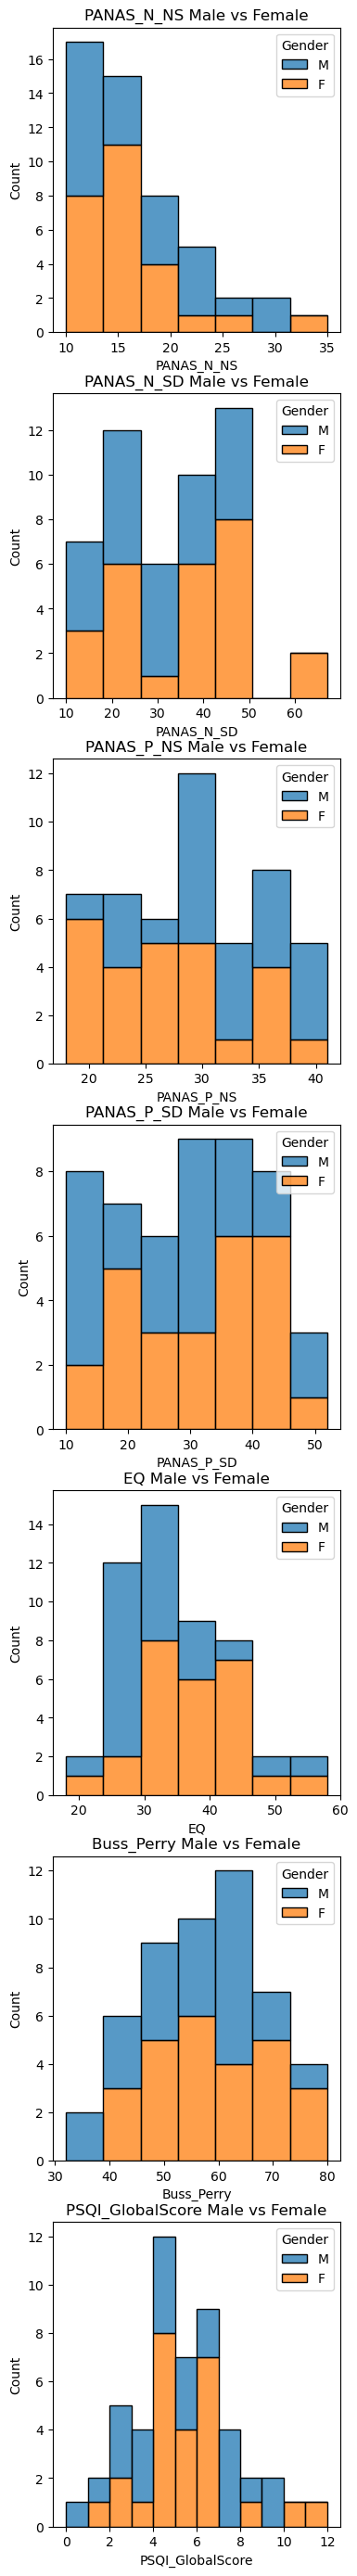

In [65]:
#plot for gender vs test results

titles = ['PANAS_N_NS','PANAS_N_SD','PANAS_P_NS','PANAS_P_SD', 'EQ', 'Buss_Perry', 'PSQI_GlobalScore'] 
f,a = plt.subplots(7,1, figsize=(4, 35))
#a = a.ravel()
#for idx,ax in enumerate(a):
#    ax.scatter(df_male.index, df_male[titles[idx]], alpha = 0.5)
#    ax.scatter(df_female.index, df_female[titles[idx]], alpha = 0.5)
#    ax.set_title(titles[idx] + " Male vs Female")
#    ax.set_xlabel('id')
#    ax.set_ylabel('score')
#    ax.legend(['male', 'female'])
#plt.show()
axindex = 0
for t in titles:
    sns.histplot(df, ax = a[axindex], x = t, hue = 'Gender', multiple="stack")
    a[axindex].set_title(t  + " Male vs Female")
    axindex+=1

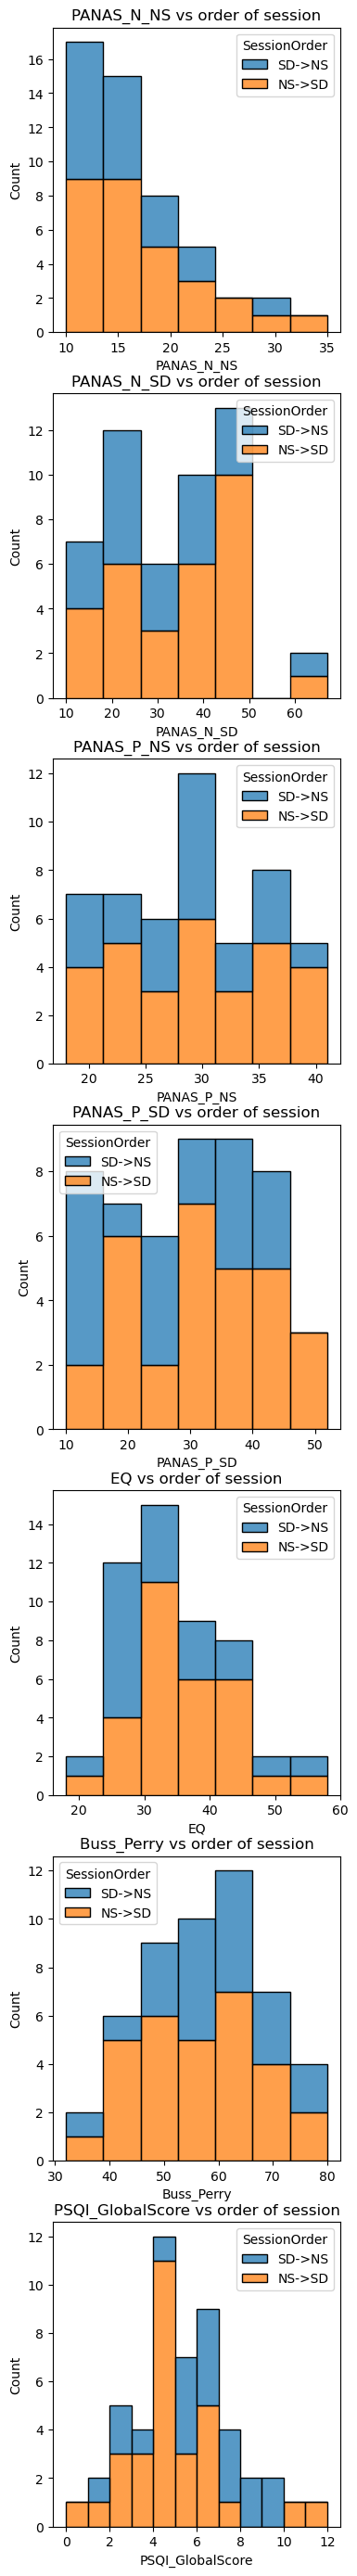

In [66]:
#plot for sample order vs test results
titles = ['PANAS_N_NS','PANAS_N_SD','PANAS_P_NS','PANAS_P_SD', 'EQ', 'Buss_Perry', 'PSQI_GlobalScore'] 
f,a = plt.subplots(7,1, figsize=(4, 35))
#a = a.ravel()
#for idx,ax in enumerate(a):
#    ax.scatter(df_sd1st.index, df_sd1st[titles[idx]], alpha = 0.5)
#    ax.scatter(df_ns1st.index, df_ns1st[titles[idx]], alpha = 0.5)
#    ax.set_title(titles[idx] + " divided by order")
#    ax.set_xlabel('id')
#    ax.set_ylabel('score')
#    ax.legend(['sleep deprive first', 'normal sleep first'])
#plt.show()

axindex = 0
for t in titles:
    sns.histplot(df, ax = a[axindex], x = t, hue = 'SessionOrder', multiple="stack")
    a[axindex].set_title(t  + " vs order of session")
    axindex+=1

It seems the PSQI scores have a relatively normal distribution, Buss-Perry score has a minimal left skew, while the EQ score has a minor right skew. PANAS_N_NS has a severe right skew, while the other PANAS results are quite randomly distributed.

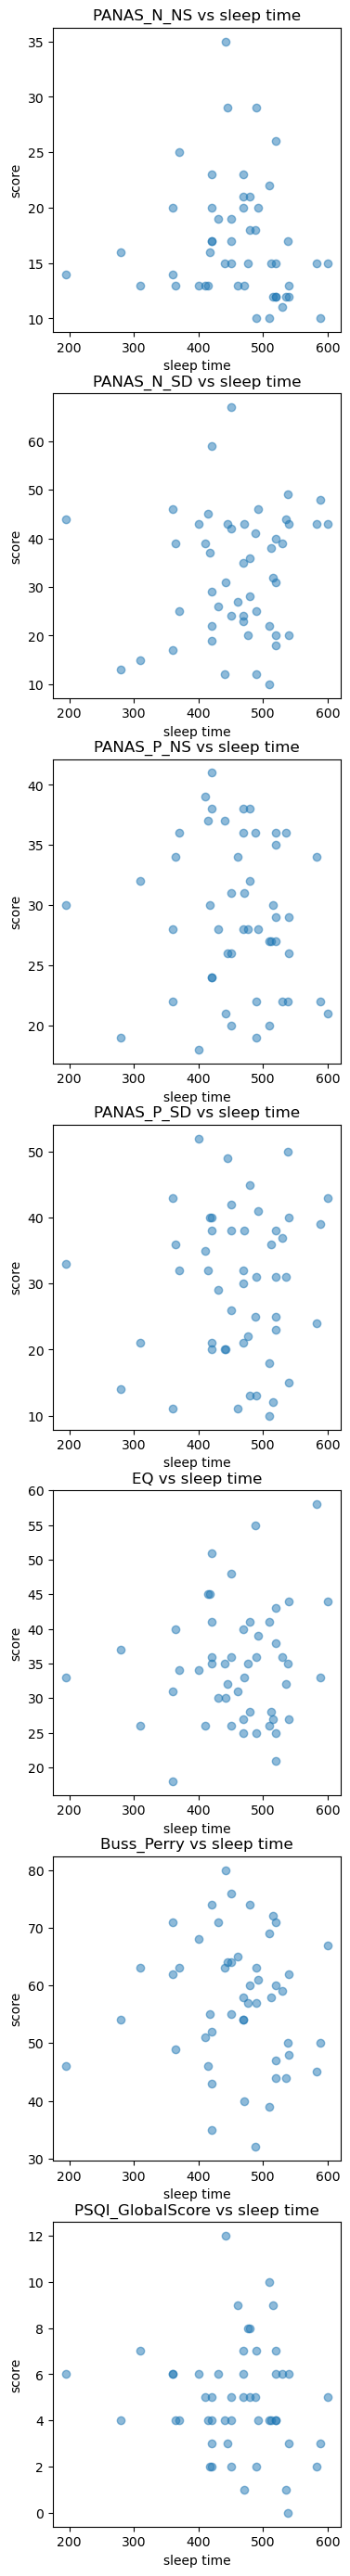

In [56]:
#plot for sleep hours vs test results

titles = ['PANAS_N_NS','PANAS_N_SD','PANAS_P_NS','PANAS_P_SD', 'EQ', 'Buss_Perry', 'PSQI_GlobalScore'] 
f,a = plt.subplots(7,1, figsize=(4, 35))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.scatter(df['Sleep_time'], df[titles[idx]], alpha = 0.5)
    ax.set_title(titles[idx] + " vs sleep time")
    ax.set_xlabel('sleep time')
    ax.set_ylabel('score')
plt.show()

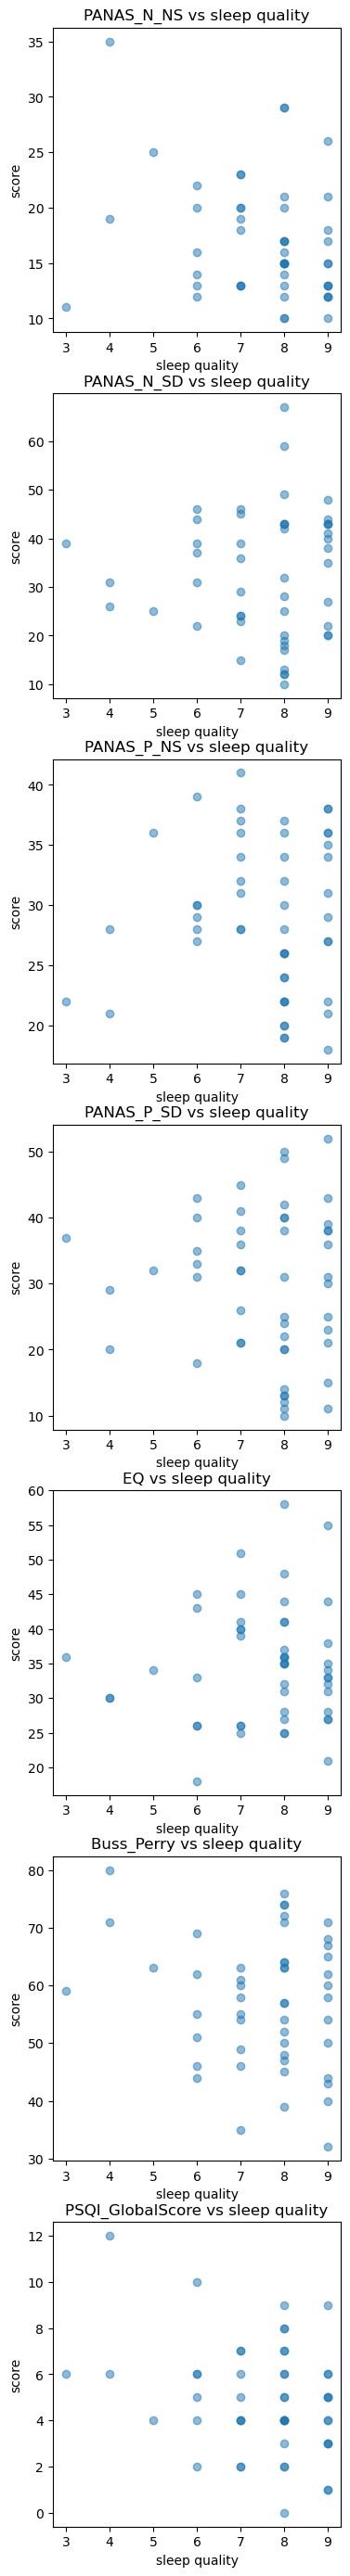

In [67]:
#plot for sleep quality vs test results

titles = ['PANAS_N_NS','PANAS_N_SD','PANAS_P_NS','PANAS_P_SD', 'EQ', 'Buss_Perry', 'PSQI_GlobalScore'] 
f,a = plt.subplots(7,1, figsize=(4, 35))
a = a.ravel()
for idx,ax in enumerate(a):
    ax.scatter(df['SleepDiary_item3_NS'], df[titles[idx]], alpha = 0.5)
    ax.set_title(titles[idx] + " vs sleep quality")
    ax.set_xlabel('sleep quality')
    ax.set_ylabel('score')
plt.show()

It seems there isn't much direct correlation between sleep time or sleep quality by themselves and the scores, we might have to factor in both at the same time.

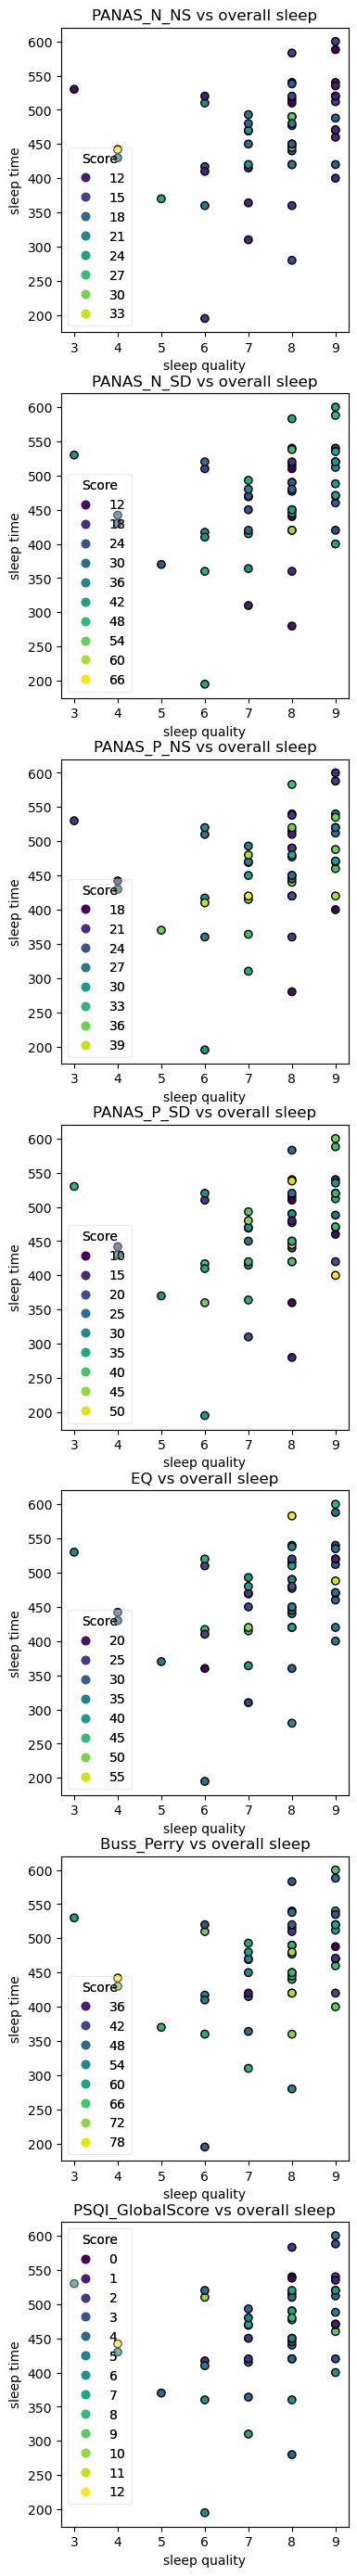

In [79]:
#plot for sleep time and quality vs test results

titles = ['PANAS_N_NS','PANAS_N_SD','PANAS_P_NS','PANAS_P_SD', 'EQ', 'Buss_Perry', 'PSQI_GlobalScore'] 
f,a = plt.subplots(7,1, figsize=(4, 35))
a = a.ravel()
for idx,ax in enumerate(a):
    scatter = ax.scatter(df['SleepDiary_item3_NS'], df['Sleep_time'], c = df[titles[idx]], edgecolors='black')
    legend = ax.legend(*scatter.legend_elements(), title="Score", framealpha=0.2)
    ax.add_artist(legend)
    ax.set_title(titles[idx] + " vs overall sleep")
    ax.set_xlabel('sleep quality')
    ax.set_ylabel('sleep time')
plt.show()

Build model with the inputs {EEG data (normal and deprived sleep), Gender, Order of taking tests, Sleep time}, output data we
try to predict are {PSQI global score, EQ, Buss Perry, PANAS scores}